In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
        
#importing Packages
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pylab as plt
import matplotlib.ticker as mtick 
from sklearn.preprocessing import StandardScaler 
from scipy.stats import norm, skew #for some statistics
from scipy import stats

#Reading Dat
data = pd.read_csv("/content/watson_healthcare_modified.csv")

**INTRODUCTION**

**Goal of creating this Notebook🎯**

Attrition is the departure of employees from the organization for any reason (voluntary or involuntary), including resignation, termination, death or retirement. Attrition rate is the rate at which employees leave an organization divided by the average number of employees at the organization over a given period of time. The aim of the Notebook is to check the quality of the data and determine which features are important. The notebook has used statistical methods like p-value, t-statistics and visualization techniques like Q-Q plot, scatter plot, box-plot of python's matplotlib and seaborn library to answer below questions about the dataset


* What are the data types? (Only numeric and categorical)
* Are there missing values?
* What are the likely distributions of the numeric variables?
* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)
* Which independent variables have missing data? How much? 
* Do the training and test sets have the same data?
* In the predictor variables independent of all the other predictor variables?
* Which predictor variables are the most important?
* Do the ranges of the predictor variables make sense?
* What are the distributions of the predictor variables?   
* Remove outliers and keep outliers (does if have an effect of the final predictive model)?
* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

**Data Set**
The data set consists of :

1. 8 characteristics of attrition i.e. Age, JobLevel, MonthlyIncome, TotalWorkingYears, YearsInCurrentRole, YearsSinceLastPromotion, YearsAtCompany, YearsWithCurrManager - The independent variables.

2. Attriton yes or no - The dependent variable.

3. There are a total of 1676 observations.

In [3]:
data = pd.read_csv("/content/watson_healthcare_modified.csv")
df = data.copy()
df_new= df.copy()

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeID,1676.0,1.456796e+06,248748.624383,1025177.0,1235831.75,1464606.0,1667992.00,1886378.0
Age,1676.0,3.686635e+01,9.129126,18.0,30.00,36.0,43.00,60.0
DailyRate,1676.0,8.005579e+02,401.594438,102.0,465.00,796.5,1157.00,1499.0
DistanceFromHome,1676.0,9.221957e+00,8.158118,1.0,2.00,7.0,14.00,29.0
Education,1676.0,2.907518e+00,1.025835,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1676.0,1.000000e+00,0.000000,1.0,1.00,1.0,1.00,1.0
EnvironmentSatisfaction,1676.0,2.714797e+00,1.097534,1.0,2.00,3.0,4.00,4.0
HourlyRate,1676.0,6.547017e+01,20.207572,30.0,48.00,65.5,83.00,100.0
JobInvolvement,1676.0,2.724940e+00,0.714121,1.0,2.00,3.0,3.00,4.0
JobLevel,1676.0,2.066826e+00,1.113423,1.0,1.00,2.0,3.00,5.0


In [5]:
df

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,Yes,Travel_Rarely,471,Neurology,24,3,Technical Degree,1,...,2,80,0,1,3,1,1,0,0,0
1672,1152327,46,No,Travel_Rarely,1125,Cardiology,10,3,Marketing,1,...,3,80,1,15,3,3,3,2,1,2
1673,1812428,20,No,Travel_Rarely,959,Maternity,1,3,Life Sciences,1,...,4,80,0,1,0,4,1,0,0,0
1674,1812429,39,No,Travel_Rarely,466,Neurology,1,1,Life Sciences,1,...,3,80,1,21,3,3,21,6,11,8


In [6]:
df.Attrition = df.Attrition.map(dict(Yes=1, No=0))

In [7]:
df

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,0,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,0,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,1,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,0,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,0,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,1,Travel_Rarely,471,Neurology,24,3,Technical Degree,1,...,2,80,0,1,3,1,1,0,0,0
1672,1152327,46,0,Travel_Rarely,1125,Cardiology,10,3,Marketing,1,...,3,80,1,15,3,3,3,2,1,2
1673,1812428,20,0,Travel_Rarely,959,Maternity,1,3,Life Sciences,1,...,4,80,0,1,0,4,1,0,0,0
1674,1812429,39,0,Travel_Rarely,466,Neurology,1,1,Life Sciences,1,...,3,80,1,21,3,3,21,6,11,8


In [8]:
#finding out datatypes
df.dtypes

EmployeeID                   int64
Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
Shift                        int64
TotalWorkingYears   

Above are all the datatypes present in dataset.
Datatypes available are int64 and object.

In [9]:
#missing values
df.isnull().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
Shift                       0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There is no missing data in the dataset, which means it is not required to impute or remove the null values from the data.

In [10]:
df.drop(columns = ["EmployeeID","EmployeeCount","StandardHours"],inplace = True)

**What are the likely distributions of the numeric variables?**

<Figure size 576x360 with 0 Axes>

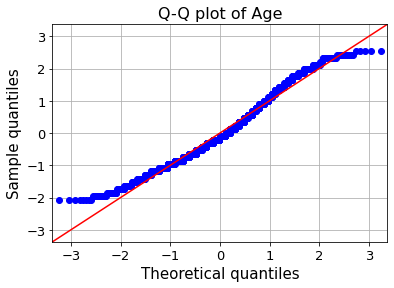

<Figure size 576x360 with 0 Axes>

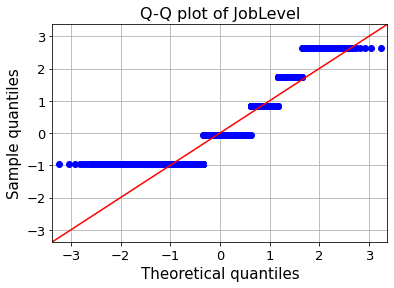

<Figure size 576x360 with 0 Axes>

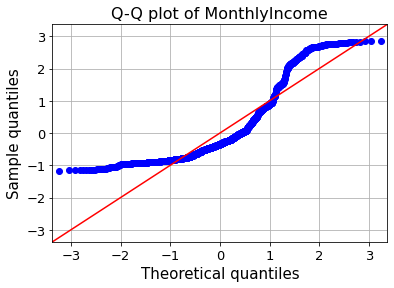

<Figure size 576x360 with 0 Axes>

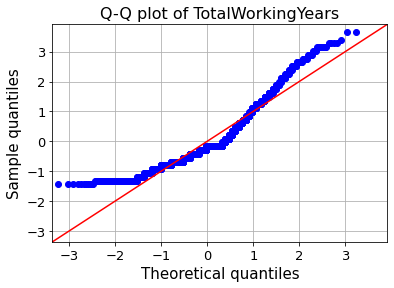

<Figure size 576x360 with 0 Axes>

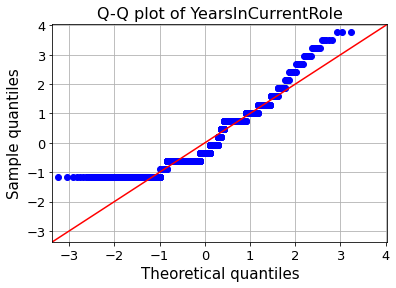

<Figure size 576x360 with 0 Axes>

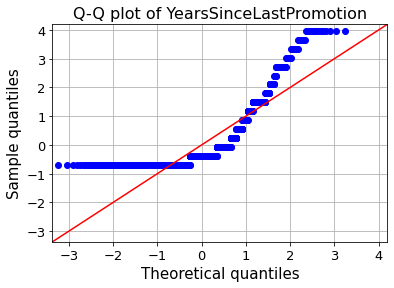

<Figure size 576x360 with 0 Axes>

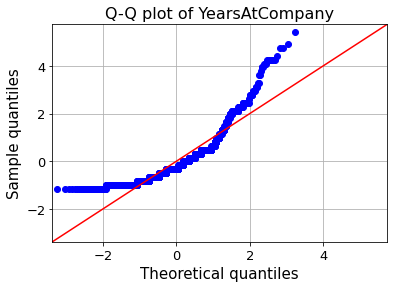

<Figure size 576x360 with 0 Axes>

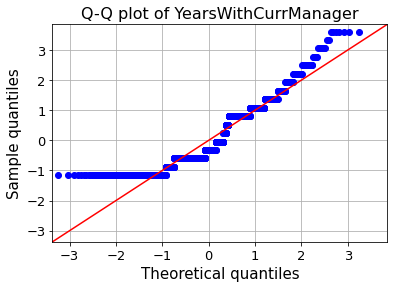

In [11]:
#checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot
data_norm=data[['Age', 'JobLevel', 'MonthlyIncome', 'TotalWorkingYears' , 'YearsInCurrentRole' , 'YearsSinceLastPromotion' , 'YearsAtCompany' , 'YearsWithCurrManager']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

In [12]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Maternity,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Maternity,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Maternity,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Maternity,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,26,1,Travel_Rarely,471,Neurology,24,3,Technical Degree,3,Male,...,3,2,0,1,3,1,1,0,0,0
1672,46,0,Travel_Rarely,1125,Cardiology,10,3,Marketing,3,Female,...,3,3,1,15,3,3,3,2,1,2
1673,20,0,Travel_Rarely,959,Maternity,1,3,Life Sciences,4,Female,...,3,4,0,1,0,4,1,0,0,0
1674,39,0,Travel_Rarely,466,Neurology,1,1,Life Sciences,4,Female,...,3,3,1,21,3,3,21,6,11,8


In [13]:
from sklearn import preprocessing

# Create x to store scaled values as floats
x = df[['Attrition']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df[['Attrition']] = pd.DataFrame(x_scaled)

In [14]:
#data after normalizing and feature creation
data.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


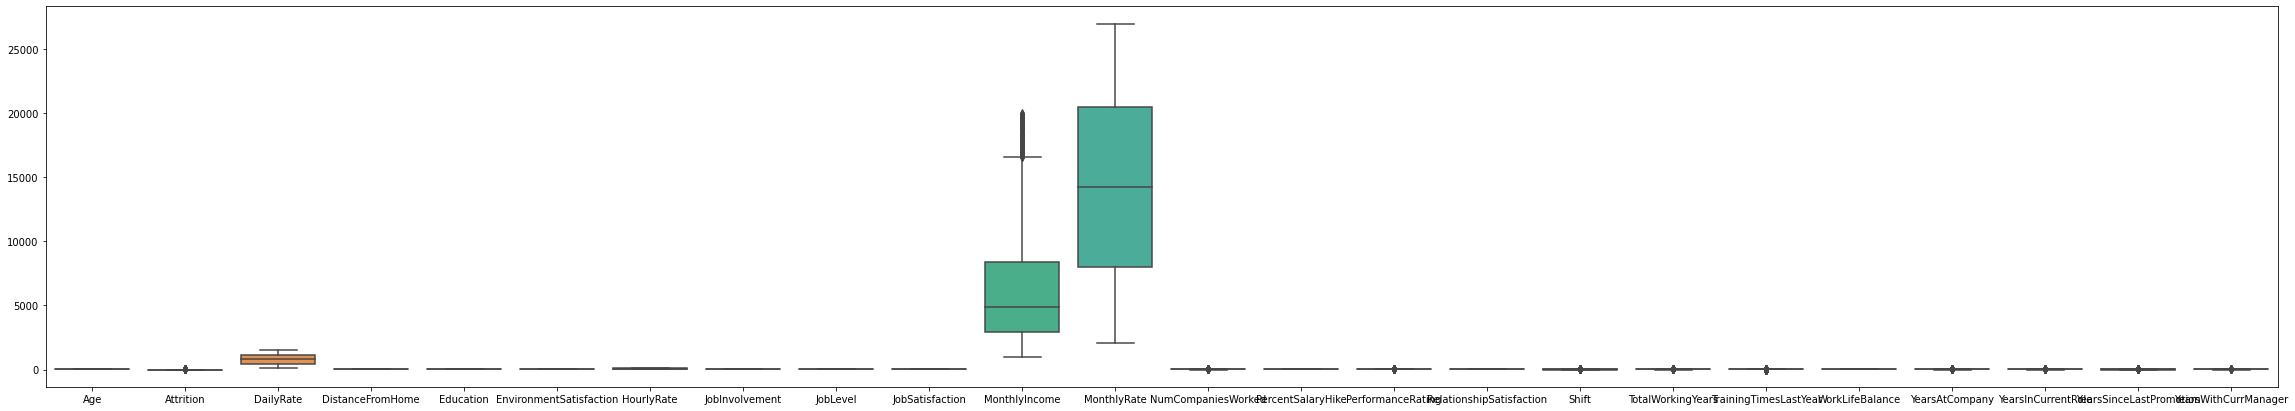

In [15]:
#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(40,7))
sns.boxplot(data=df)

**Modelling using correlation**

In [16]:
#checking the correlation between all the features in the data
df.corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.239984,0.001441,-0.010079,0.204655,0.008945,0.034671,0.034193,0.518333,-0.015848,...,0.005246,0.058528,0.037117,0.692512,-0.015408,-0.004878,0.319012,0.222655,0.217212,0.215909
Attrition,-0.239984,1.000000,-0.053892,0.105580,-0.038843,-0.101278,-0.036300,-0.166036,-0.207634,-0.081881,...,0.010728,-0.020462,-0.158322,-0.234182,-0.054836,-0.090513,-0.201373,-0.207891,-0.086207,-0.201087
DailyRate,0.001441,-0.053892,1.000000,-0.009227,-0.015881,0.010620,0.027128,0.058864,0.009005,0.032115,...,0.003353,0.014539,0.054407,0.009378,0.001901,-0.028549,-0.026892,0.019651,-0.034571,-0.025272
DistanceFromHome,-0.010079,0.105580,-0.009227,1.000000,0.015937,-0.019730,0.026947,0.010281,-0.023455,-0.004758,...,0.020482,0.005482,0.029180,-0.017663,-0.055471,-0.037821,-0.007420,0.011448,-0.000126,0.000403
Education,0.204655,-0.038843,-0.015881,0.015937,1.000000,-0.031925,0.017996,0.041046,0.093227,-0.003957,...,-0.020664,-0.005750,0.024451,0.143324,-0.014070,0.003933,0.057461,0.051029,0.045785,0.055096
EnvironmentSatisfaction,0.008945,-0.101278,0.010620,-0.019730,-0.031925,1.000000,-0.057505,-0.007220,0.008277,0.001518,...,-0.029104,0.003221,0.005283,0.000208,-0.017722,0.027262,-0.000448,0.012241,0.005866,-0.012417
HourlyRate,0.034671,-0.036300,0.027128,0.026947,0.017996,-0.057505,1.000000,0.034741,-0.018830,-0.073942,...,-0.000370,0.000601,0.051862,0.005988,-0.007194,-0.009956,-0.014742,-0.016776,-0.028642,-0.021436
JobInvolvement,0.034193,-0.166036,0.058864,0.010281,0.041046,-0.007220,0.034741,1.000000,-0.013660,-0.039738,...,-0.017970,0.045107,0.025999,-0.001576,-0.031580,-0.006931,-0.013652,0.020541,-0.022153,0.031574
JobLevel,0.518333,-0.207634,0.009005,-0.023455,0.093227,0.008277,-0.018830,-0.013660,1.000000,-0.012497,...,-0.008759,0.030606,0.010478,0.780929,-0.004251,0.047481,0.532529,0.387624,0.343102,0.379717
JobSatisfaction,-0.015848,-0.081881,0.032115,-0.004758,-0.003957,0.001518,-0.073942,-0.039738,-0.012497,1.000000,...,0.008859,-0.018232,0.017740,-0.021435,-0.003440,-0.017280,0.005376,-0.001337,-0.013595,-0.023042


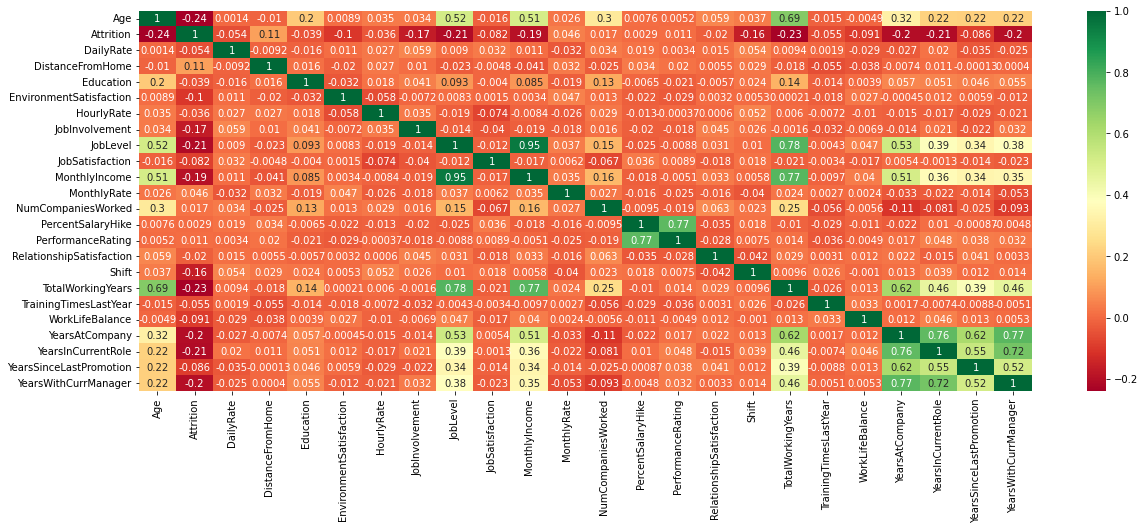

In [17]:
#the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

**Modelling using OLS Regression**

In [18]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(df['Attrition'], df[['Age', 'JobLevel', 'MonthlyIncome', 'TotalWorkingYears' , 'YearsInCurrentRole' , 'YearsSinceLastPromotion' , 'YearsAtCompany' , 'YearsWithCurrManager']]).fit()

# Print out the statistics
model.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Attrition   R-squared (uncentered):                   0.130
Model:                            OLS   Adj. R-squared (uncentered):              0.126
Method:                 Least Squares   F-statistic:                              31.29
Date:                Mon, 10 Oct 2022   Prob (F-statistic):                    5.00e-46
Time:                        03:20:05   Log-Likelihood:                         -475.30
No. Observations:                1676   AIC:                                      966.6
Df Residuals:                    1668   BIC:                                      1010.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Age                         0.0058      0.001      9.512      0.000       0.005       0.007
JobLevel                    0.0544      0.023      2.412      0.016       0.010       0.099
MonthlyIncome           -1.053e-05   5.38e-06     -1.956      0.051   -2.11e-05    3.16e-08
TotalWorkingYears          -0.0112      0.002     -5.950      0.000      -0.015      -0.008
YearsInCurrentRole         -0.0081      0.004     -2.270      0.023      -0.015      -0.001
YearsSinceLastPromotion     0.0074      0.003      2.370      0.018       0.001       0.014
YearsAtCompany              0.0014      0.003      0.517      0.605      -0.004       0.007
YearsWithCurrManager       -0.0051      0.004     -1.391      0.164      -0.012       0.002
==============================================================================
Omnibus:                      673.143   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1973.354
Skew:                           2.160   Prob(JB):                         0.00
Kurtosis:                       6.098   Cond. No.                     2.31e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Building the Model  
Train and Test split**

In [19]:
from sklearn.model_selection import  train_test_split

X = df[['Age', 'JobLevel', 'MonthlyIncome', 'TotalWorkingYears' , 'YearsInCurrentRole' , 'YearsSinceLastPromotion' , 'YearsAtCompany' , 'YearsWithCurrManager']]

y = df['Attrition']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

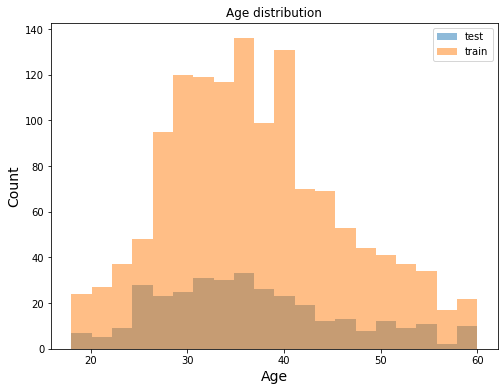

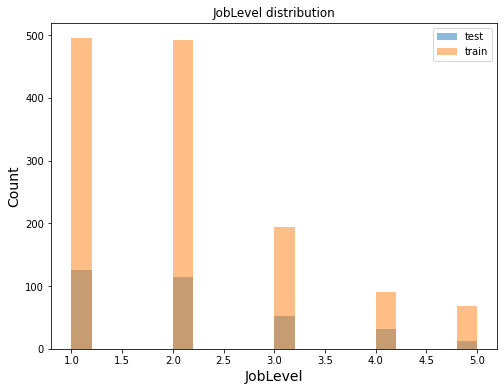

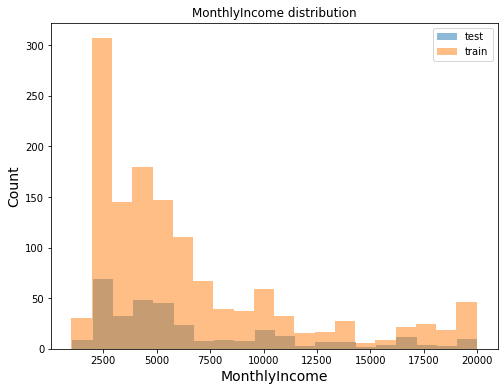

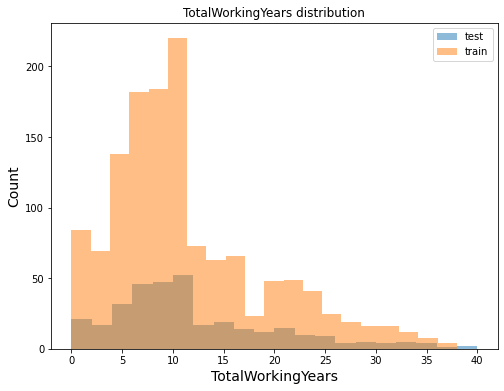

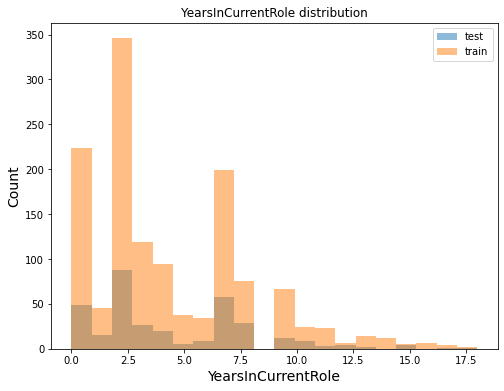

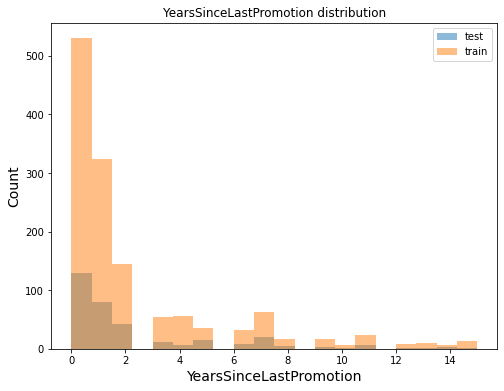

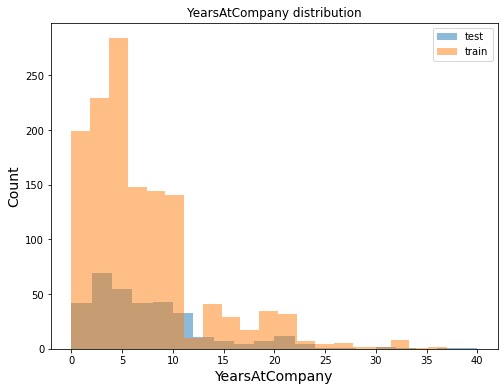

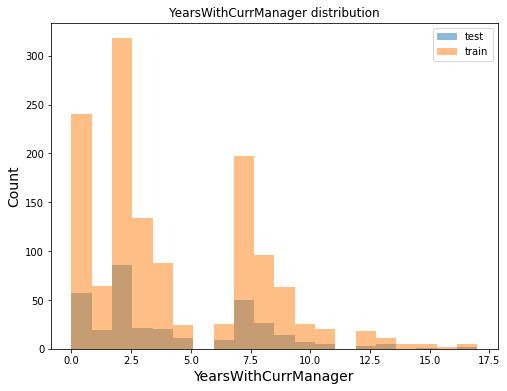

In [20]:
# Looking the data for test, training and validation set
X_test_plot = X_test[['Age', 'JobLevel', 'MonthlyIncome', 'TotalWorkingYears' , 'YearsInCurrentRole' , 'YearsSinceLastPromotion' , 'YearsAtCompany' , 'YearsWithCurrManager']]


X_train_plot = X_train[['Age', 'JobLevel', 'MonthlyIncome', 'TotalWorkingYears' , 'YearsInCurrentRole' , 'YearsSinceLastPromotion' , 'YearsAtCompany' , 'YearsWithCurrManager']]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

**Modelling Using Logistic Regression**

In [21]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

# Print the prediction accuracy
from sklearn import metrics
prediction_test = model.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8869047619047619


In [24]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 7.6 MB/s 
     |████████████████████████████████| 133 kB 64.7 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=6d7b618446109420c339738a6ce043739e12680f89bd36a43b0642fd8d4f389f
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [25]:
#Understanding the important features 
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0119 ± 0.0136,YearsSinceLastPromotion
0 ± 0.0000,YearsWithCurrManager
0 ± 0.0000,YearsAtCompany
0 ± 0.0000,YearsInCurrentRole
0 ± 0.0000,TotalWorkingYears
0 ± 0.0000,MonthlyIncome
0 ± 0.0000,JobLevel
0 ± 0.0000,Age


**REMOVING OUTLIER**

In [26]:
scaler= StandardScaler()


X_new = df_new[['Age', 'JobLevel', 'MonthlyIncome', 'TotalWorkingYears' , 
                'YearsInCurrentRole' , 'YearsSinceLastPromotion' , 'YearsAtCompany' ,
                'YearsWithCurrManager']]

y_new = df_new['Attrition']

X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size=0.2, random_state=1)

X_new = scaler.fit_transform(X_new)


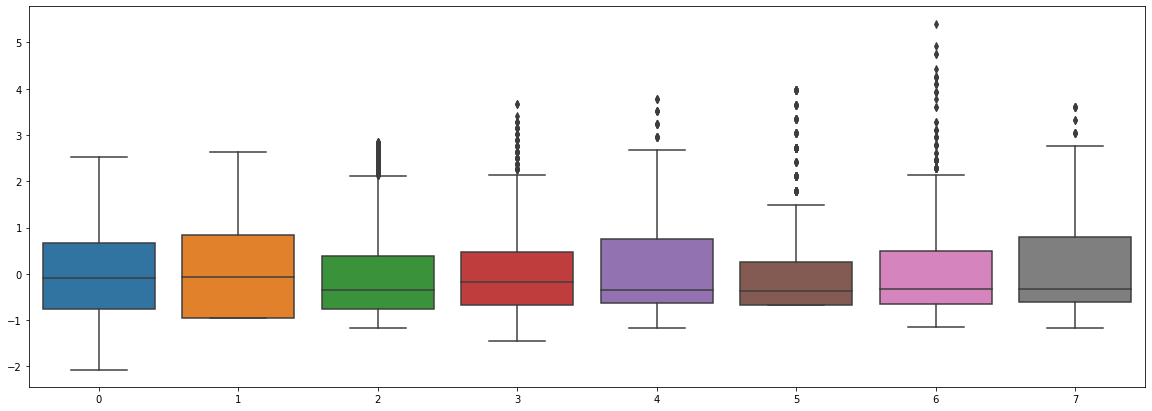

In [27]:
plt.figure(figsize=(20,7))
sns.boxplot(data=X_new)

In [28]:
Q1Age,Q3Age = np.percentile(df_new['Age'] , [25,75])
IQR1 = Q3Age - Q1Age

UAge =Q3Age + 1.5*IQR1

LAge = Q1Age - 1.5*IQR1

print(UAge)
print(LAge)

df_new.drop(df_new[df_new['Age'] < LAge].index, inplace=True)
df_new.drop(df_new[df_new['Age'] > UAge].index, inplace=True)

62.5
10.5


In [29]:
Q1Job,Q3Job = np.percentile(df_new['JobLevel'] , [25,75])
IQR2 = Q3Job - Q1Job

UJob =Q3Job + 1.5*IQR2

LJob = Q1Job - 1.5*IQR2

print(UJob)
print(LJob)

df_new.drop(df_new[df_new['JobLevel'] < LJob].index, inplace=True)
df_new.drop(df_new[df_new['JobLevel'] > UJob].index, inplace=True)

6.0
-2.0


In [30]:
Q1Inc,Q3Inc = np.percentile(df_new['MonthlyIncome'] , [25,75])
IQR3 = Q3Inc - Q1Inc

UInc =Q3Inc + 1.5*IQR3

LInc = Q1Inc - 1.5*IQR3

print(UInc)
print(LInc)

df_new.drop(df_new[df_new['MonthlyIncome'] < LInc].index, inplace=True)
df_new.drop(df_new[df_new['MonthlyIncome'] > UInc].index, inplace=True)


16558.25
-5249.75


In [31]:
Q1Role,Q3Role= np.percentile(df_new['YearsInCurrentRole'] , [25,75])
IQR5 = Q3Role - Q1Role

URole =Q3Role + 1.5*IQR5

LRole = Q1Role - 1.5*IQR5

print(URole)
print(LRole)

df_new.drop(df_new[df_new['YearsInCurrentRole'] < LRole].index, inplace=True)
df_new.drop(df_new[df_new['YearsInCurrentRole'] > URole].index, inplace=True)


14.5
-5.5


In [32]:
Q1TWY,Q3TWY = np.percentile(df_new['TotalWorkingYears'] , [25,75])
IQR4 = Q3TWY - Q1TWY

UTWY =Q3TWY + 1.5*IQR4

LTWY = Q1TWY - 1.5*IQR4

print(UTWY)
print(LTWY)

df_new.drop(df_new[df_new['TotalWorkingYears'] < LTWY].index, inplace=True)
df_new.drop(df_new[df_new['TotalWorkingYears'] > UTWY].index, inplace=True)

23.5
-4.5


In [33]:
Q1Comp,Q3Comp = np.percentile(df_new['YearsAtCompany'] , [25,75])
IQR7 = Q3Comp - Q1Comp

UComp =Q3Comp + 1.5*IQR7

LComp = Q1Comp - 1.5*IQR7

print(UComp)
print(LComp)

df_new.drop(df_new[df_new['YearsAtCompany'] < LComp].index, inplace=True)
df_new.drop(df_new[df_new['YearsAtCompany'] > UComp].index, inplace=True)

18.375
-6.625


In [34]:
Q1Man,Q3Man = np.percentile(df_new['YearsWithCurrManager'] , [25,75])
IQR8 = Q3Man - Q1Man

UMan =Q3Man + 1.5*IQR8

LMan = Q1Man - 1.5*IQR8

print(UMan)
print(LMan)

df_new.drop(df_new[df_new['YearsWithCurrManager'] < LMan].index, inplace=True)
df_new.drop(df_new[df_new['YearsWithCurrManager'] > UMan].index, inplace=True)

14.5
-5.5


In [35]:
df_new.describe()

,EmployeeID,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1.430000e+03,1430.000000,1430.000000,1430.000000,1430.000000,1430.0,1430.000000,1430.000000,1430.000000,1430.000000,...,1430.000000,1430.0,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000
mean,1.458065e+06,35.019580,801.620280,9.360140,2.897203,1.0,2.709091,65.602797,2.733566,1.734266,...,2.692308,80.0,0.813986,8.825175,2.821678,2.764336,5.613986,3.788811,1.715385,3.630070
std,2.482894e+05,8.258145,399.763263,8.137703,1.027913,0.0,1.092945,20.246632,0.715464,0.744008,...,1.082534,0.0,0.868756,4.912694,1.309792,0.708630,3.875685,3.204508,2.493822,3.133747
min,1.025177e+06,18.000000,103.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.237442e+06,29.000000,468.250000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,5.000000,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000
50%,1.464520e+06,34.000000,800.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,2.000000
75%,1.668442e+06,40.000000,1153.000000,14.750000,4.000000,1.0,4.000000,83.000000,3.000000,2.000000,...,4.000000,80.0,1.000000,11.000000,3.000000,3.000000,8.000000,7.000000,2.000000,7.000000
max,1.886378e+06,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,4.000000,...,4.000000,80.0,3.000000,23.000000,6.000000,4.000000,18.000000,14.000000,15.000000,14.000000


In [38]:
scaler= StandardScaler()


X_new = df_new[['Age', 'JobLevel', 'MonthlyIncome', 'TotalWorkingYears' , 
                'YearsInCurrentRole' , 'YearsSinceLastPromotion' , 'YearsAtCompany' ,
                'YearsWithCurrManager']]

y_new = df_new['Attrition']

X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size=0.2, random_state=1)

X_new = scaler.fit_transform(X_new)


In [39]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_new_train, y_new_train)

# Print the prediction accuracy
from sklearn import metrics
prediction_new_test = model.predict(X_new_test)
print (metrics.accuracy_score(y_new_test, prediction_new_test))

0.8426573426573427


**IMPUTATION**

In [40]:
df_null_1=df[['Age','JobLevel','YearsAtCompany']].copy()
df_null_5=df[['Age','JobLevel','YearsAtCompany']].copy()
df_null_10=df[['Age','JobLevel','YearsAtCompany']].copy()

# Creating a list of 1% data and filling with NaN
empty_1=df_null_1['JobLevel'].sample(frac=0.01, replace=True, random_state=1)
df_null_1.loc[empty_1.index, 'JobLevel'] = np.NaN

# Creating a list of 5% data and filling with NaN
empty_5=df_null_5['JobLevel'].sample(frac=0.05, replace=True, random_state=1)
df_null_5.loc[empty_5.index, 'JobLevel'] = np.NaN

# Creating a list of 10% data and filling with NaN
empty_10=df_null_10['JobLevel'].sample(frac=0.1, replace=True, random_state=1)
df_null_10.loc[empty_10.index, 'JobLevel'] = np.NaN

In [41]:
#import SimpleImputer
from sklearn.impute import SimpleImputer

#Fill with most frequent
simple_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

#For 1%
df_filled_1=pd.DataFrame(simple_imputer.fit_transform(df_null_1))
df_filled_1.columns=df_null_1.columns
df_filled_1.index=df_null_1.index
job_filled_1=df_filled_1.iloc[empty_1.index].JobLevel

#For 5%
df_filled_5=pd.DataFrame(simple_imputer.fit_transform(df_null_5))
df_filled_5.columns=df_null_5.columns
df_filled_5.index=df_null_5.index
job_filled_5=df_filled_5.iloc[empty_5.index].JobLevel

#For 10%
df_filled_10=pd.DataFrame(simple_imputer.fit_transform(df_null_10))
df_filled_10.columns=df_null_10.columns
df_filled_10.index=df_null_10.index
job_filled_10=df_filled_10.iloc[empty_10.index].JobLevel

In [42]:
# Calculation percentage of residual errors
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [43]:
# Percentage of Residual errors at 1%, 5% and 10% data for monthly Charges
MAPE(empty_1, job_filled_1), MAPE(empty_5, job_filled_5), MAPE(empty_10, job_filled_10)

(49.023744518904614, 45.725159178549, 46.663296655067555)

In [44]:
#import SimpleImputer
from sklearn.impute import SimpleImputer

#Fill with most frequent
simple_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

#For 1%
df_filled_1=pd.DataFrame(simple_imputer.fit_transform(df_null_1))
df_filled_1.columns=df_null_1.columns
df_filled_1.index=df_null_1.index
job_filled_1=df_filled_1.iloc[empty_1.index].JobLevel

#For 5%
df_filled_5=pd.DataFrame(simple_imputer.fit_transform(df_null_5))
df_filled_5.columns=df_null_5.columns
df_filled_5.index=df_null_5.index
job_filled_5=df_filled_5.iloc[empty_5.index].JobLevel

#For 10%
df_filled_10=pd.DataFrame(simple_imputer.fit_transform(df_null_10))
df_filled_10.columns=df_null_10.columns
df_filled_10.index=df_null_10.index
job_filled_10=df_filled_10.iloc[empty_10.index].JobLevel

In [45]:
# Percentage of Residual errors at 1%, 5% and 10% data for monthly Charges
MAPE(empty_1, job_filled_1), MAPE(empty_5, job_filled_5), MAPE(empty_10, job_filled_10)

(37.745098039215684, 40.57539682539681, 39.88095238095239)

In [46]:
#import KNNImputer
from sklearn.impute import KNNImputer

#Fill with most frequent
simple_imputer = KNNImputer(missing_values=np.nan)

#For 1%
df_filled_1=pd.DataFrame(simple_imputer.fit_transform(df_null_1))
df_filled_1.columns=df_null_1.columns
df_filled_1.index=df_null_1.index
job_filled_1=df_filled_1.iloc[empty_1.index].JobLevel

#For 5%
df_filled_5=pd.DataFrame(simple_imputer.fit_transform(df_null_5))
df_filled_5.columns=df_null_5.columns
df_filled_5.index=df_null_5.index
job_filled_5=df_filled_5.iloc[empty_5.index].JobLevel

#For 10%
df_filled_10=pd.DataFrame(simple_imputer.fit_transform(df_null_10))
df_filled_10.columns=df_null_10.columns
df_filled_10.index=df_null_10.index
job_filled_10=df_filled_10.iloc[empty_10.index].JobLevel

In [47]:
# Percentage of Residual errors at 1%, 5% and 10% data for monthly Charges
MAPE(empty_1, job_filled_1), MAPE(empty_5, job_filled_5), MAPE(empty_10, job_filled_10)

(37.05882352941177, 28.829365079365076, 32.773809523809526)

**Answers for the given questions**

**What are the data types?**   
Both data types are there i.e. categorical and numeric.



**Are there missing values?**  
There are no missing values.



**Which independent variables have missing data? How much?**  
A: No independent variables have any missing data or zeros.



**Which independent variables are useful to predict a target (dependent variable)?**    
A: Below variables are useful to predict
* Age
* JobLevel
* MonthlyIncome
* TotalWorkingYears
* YearsInCurrentRole
* YearsSinceLastPromotion
* YearsAtCompany
* YearsWithCurrManager  

The methods used are Correlation, OLS regression and logistic Regression.



**Which predictor variables are the most important?**    
A: Below variables are most important
* YearsSinceLastPromotion
* YearsAtCompany
* YearsWithCurrManager
* JobLevel



**Do the training and test sets have the same data?**    
A: Yes they have same distribution of data as they have been derived from same dataset and split into 80/20 split.




**In the predictor variables independent of all the other predictor variables?**    
A: Yes there is multi-colinearity between independent variables.




**Do the ranges of the predictor variables make sense?**     
A: No it doesnt make sense as monthly income and monthly rate have large range, so we have standarized the data.


**Remove outliers and keep outliers (does if have an effect of the final predictive model)?**   
A: Yes there was an effect on the final predictive model after removing the outliers as the accuracy changed.


**Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.
**  

A: Imputing the values using KNN imputer, it performed better compared to Mean Simple Imputer and most frequent simple imputer.


**LICENSE**   
Copyright (c) 2022 udayshelke

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.